In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as glo
import plotly.express as px

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

#loading and retriving database
df = pd.read_csv("/content/netflix_titles.csv")
df_tv = df[df["type"]=="TV Show"]
df_movies=df[df["type"]=="Movie"]
# df.tail(5)
# df.head(5)
# df.info()
# #df_movies.head()
# df_yr_19=df[df["release_year"]==2019]
# df_yr_19.head()

#print count of row and column
# print(colored("There are {} rows and {} column in the data set".format(df.shape[0],df.shape[1],attrs=['Bold'])))
# df.shape

#adding column to the dataframe

df["date_added"] = pd.to_datetime(df['date_added'])
#we are converting datatype
type(df["date_added"][0])
df["date_added"].head()


0   2019-09-09
1   2016-09-09
2   2018-09-08
3   2018-09-08
4   2017-09-08
Name: date_added, dtype: datetime64[ns]

In [24]:
df["month_added"]=df["date_added"].dt.month
df["month_name_added"]=df["date_added"].dt.month_name()
df["year_added"]=df["date_added"].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6234 non-null   int64         
 1   type              6234 non-null   object        
 2   title             6234 non-null   object        
 3   director          4265 non-null   object        
 4   cast              5664 non-null   object        
 5   country           5758 non-null   object        
 6   date_added        6223 non-null   datetime64[ns]
 7   release_year      6234 non-null   int64         
 8   rating            6224 non-null   object        
 9   duration          6234 non-null   object        
 10  listed_in         6234 non-null   object        
 11  description       6234 non-null   object        
 12  month_added       6223 non-null   float64       
 13  month_name_added  6223 non-null   object        
 14  year_added        6223 n

In [32]:
#TO see the rate of null values across all column:

for i in df.columns:
  null_rate = df[i].isna().sum() / len(df)*100
  if null_rate > 0:
    print("{}'s null rate :{}%".format(i,round(null_rate,3)))
# df.isnull()

director's null rate :31.585%
cast's null rate :9.143%
country's null rate :7.636%
date_added's null rate :0.176%
rating's null rate :0.16%
month_added's null rate :0.176%
month_name_added's null rate :0.176%
year_added's null rate :0.176%


In [67]:
# df["rating"].value_counts()
df["year_added"].value_counts()
# df.nunique()

2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [ ]:
df['country'].replace(np.nan,'United States',inplace = True)
df['cast'].replace(np.nan,'No data',inplace = True)
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df)*100
  if null_rate > 0:
    print("{}'s null rate :{}%".format(i,round(null_rate,3)))


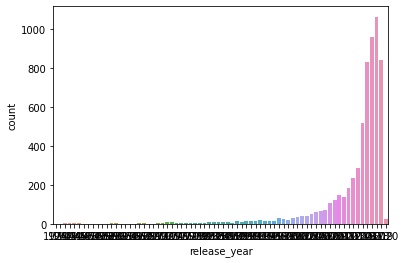

In [45]:
#CountPlout

# sns.countplot(x='type',data = df)
sns.countplot(x='release_year',data = df)

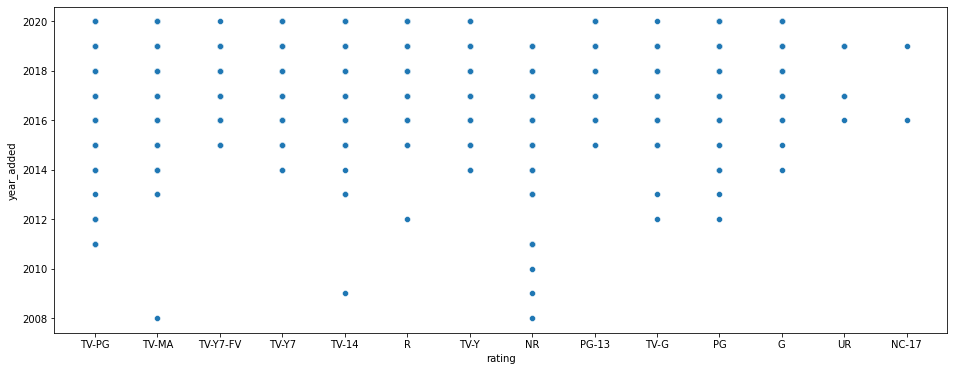

In [49]:
#Scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='year_added',data = df)

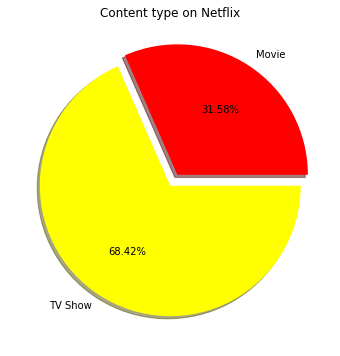

In [57]:
plt.figure(figsize=(16,6))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.1,0],
        autopct='%1.2f%%',colors=['Red','Yellow'], shadow=True)
plt.title('Content type on Netflix')
plt.show()

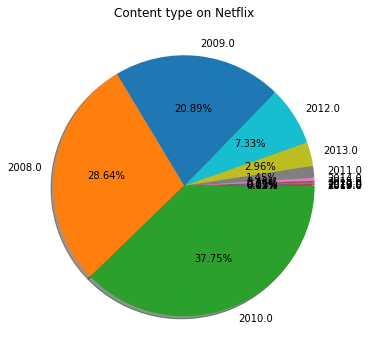

In [61]:
plt.figure(figsize=(16,6))
plt.pie(df['year_added'].value_counts().sort_values(),labels=df['year_added'].value_counts().index,
        autopct='%1.2f%%',shadow=True)
plt.title('Content type on Netflix')
plt.show()

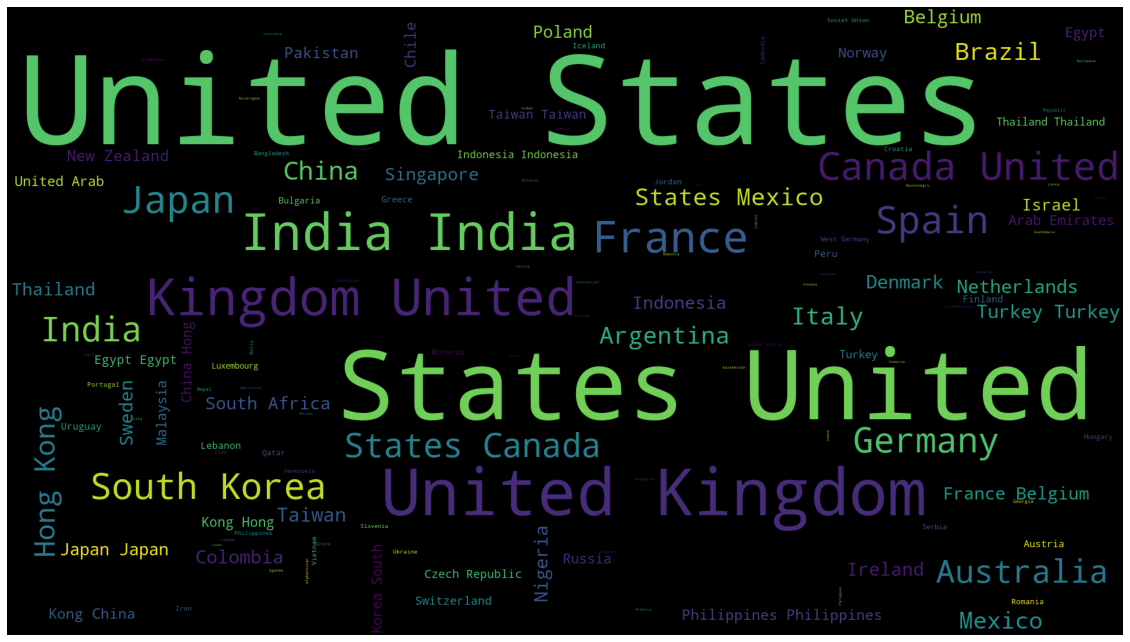

In [63]:
#Word Cloud

from wordcloud import WordCloud

plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()


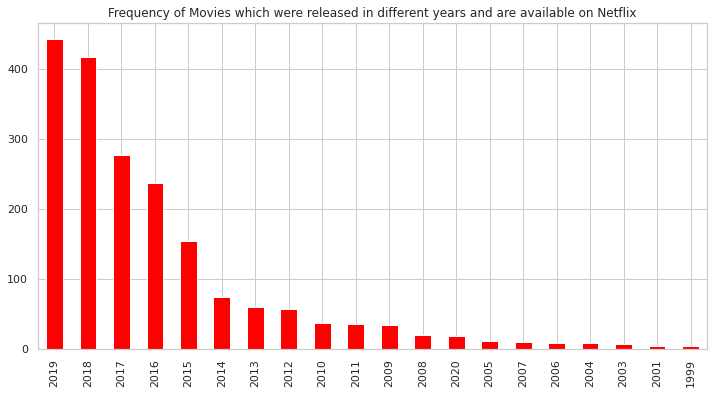

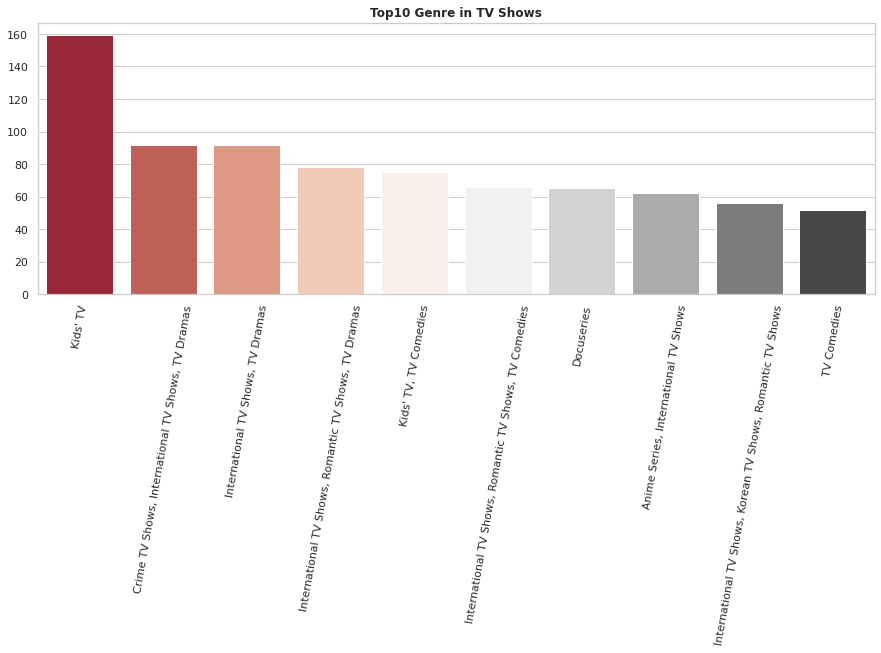

In [66]:
#Top-20 countries producing most contents { Bar Plot }:

country_counter=df['country'].value_counts().sort_values(ascending=False) #countries with the most rated content
country_counter=pd.DataFrame(country_counter)
top20country=country_counter[0:21]
top20country

plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")


#Top 10 Genre available in TV show

plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()